In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Inferring masses with realistic error distribution with the isochrones package**

A short tutorial how to use the isochrones package to infer stellar parameters from observations.

The isochrone package can be inspected and downloaded from here: https://github.com/timothydmorton/isochrones

In [2]:
# Loading the isochrone models
from isochrones.dartmouth import Dartmouth_Isochrone
from isochrones.mist import MIST_Isochrone
from isochrones import StarModel

/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Showing the available bands
dar = Dartmouth_Isochrone()
dar.bands

/home/rybizki/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


['B', 'V', 'g', 'r', 'i', 'z', 'J', 'H', 'K', 'W1', 'W2', 'W3', 'Kepler']

In [4]:
mist = MIST_Isochrone()
mist.bands

['B',
 'BP',
 'G',
 'H',
 'J',
 'K',
 'Kepler',
 'RP',
 'TESS',
 'V',
 'W1',
 'W2',
 'W3',
 'g',
 'i',
 'r',
 'z']

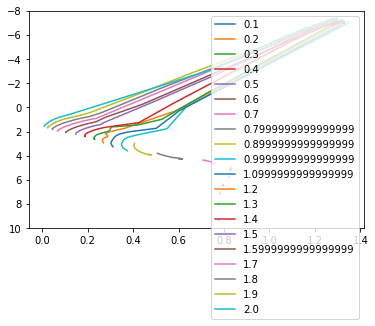

In [5]:
# Plotting darthmouth isochrones

for mass in np.linspace(0.1,2.,20):
    x = dar.evtrack(mass)
    plt.plot(x.J_mag-x.K_mag,x.K_mag,label='%s' %(mass))
plt.ylim(10,-8)
plt.legend()

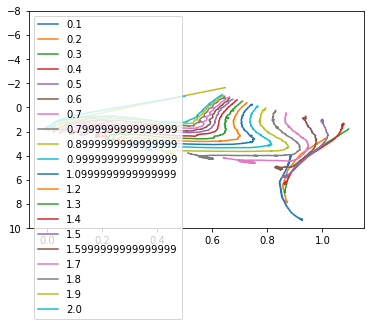

In [6]:
# Plotting mist isochrones

for mass in np.linspace(0.1,2.,20):
    x = mist.evtrack(mass)
    plt.plot(x.J_mag-x.K_mag,x.K_mag,label='%s' %(mass))
plt.ylim(10,-8)
plt.legend()

In [7]:
# Like this we can constrain the extinction to be close to 0
from isochrones.priors import FlatPrior
av_prior = FlatPrior((0,0.1))

{'B': (10.8, 0.05), 'V': (9.72, 0.03), 'J': (7.865, 0.024), 'K': (7.207, 0.023)}


/home/rybizki/anaconda3/lib/python3.6/site-packages/isochrones/starmodel.py:487: RuntimeWarning: divide by zero encountered in log
  lnp += np.log(self.prior(prop, val))


------------------
mist isochrones
mass in Msun (percentiles written on the left): 
0.16    0.715865
0.50    0.747951
0.86    0.783444
Name: mass_0_0, dtype: float64
extinction A_V: 
0.16    0.019886
0.50    0.055381
0.86    0.087617
Name: AV_0, dtype: float64
[Fe/H]: 
0.16    0.038369
0.50    0.111485
0.86    0.174383
Name: feh_0, dtype: float64
Age in Gyr: 
0.16     9.625719
0.50    10.028106
0.86    10.232179
Name: age_0, dtype: float64
distance in pc: 
0.16    38.995350
0.50    39.033740
0.86    39.075076
Name: distance_0, dtype: float64
radius in solar radii: 
0.16    0.725562
0.50    0.732188
0.86    0.739614
Name: radius_0_0, dtype: float64
mist
mist


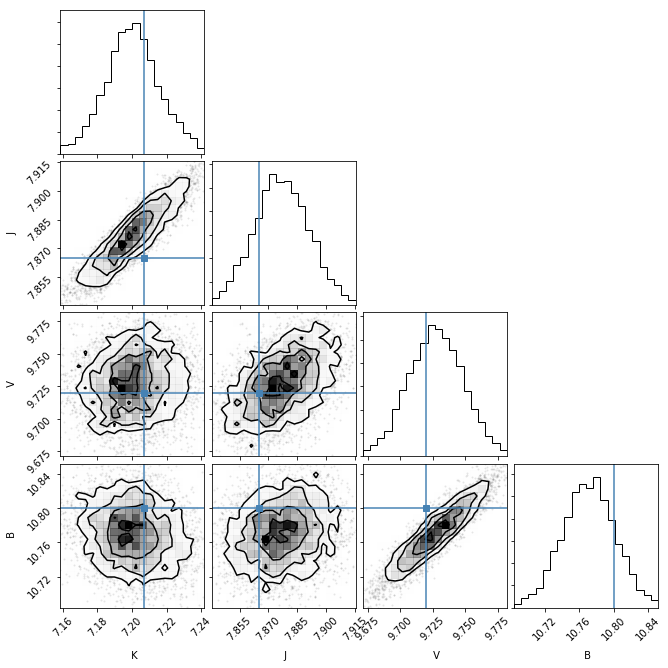

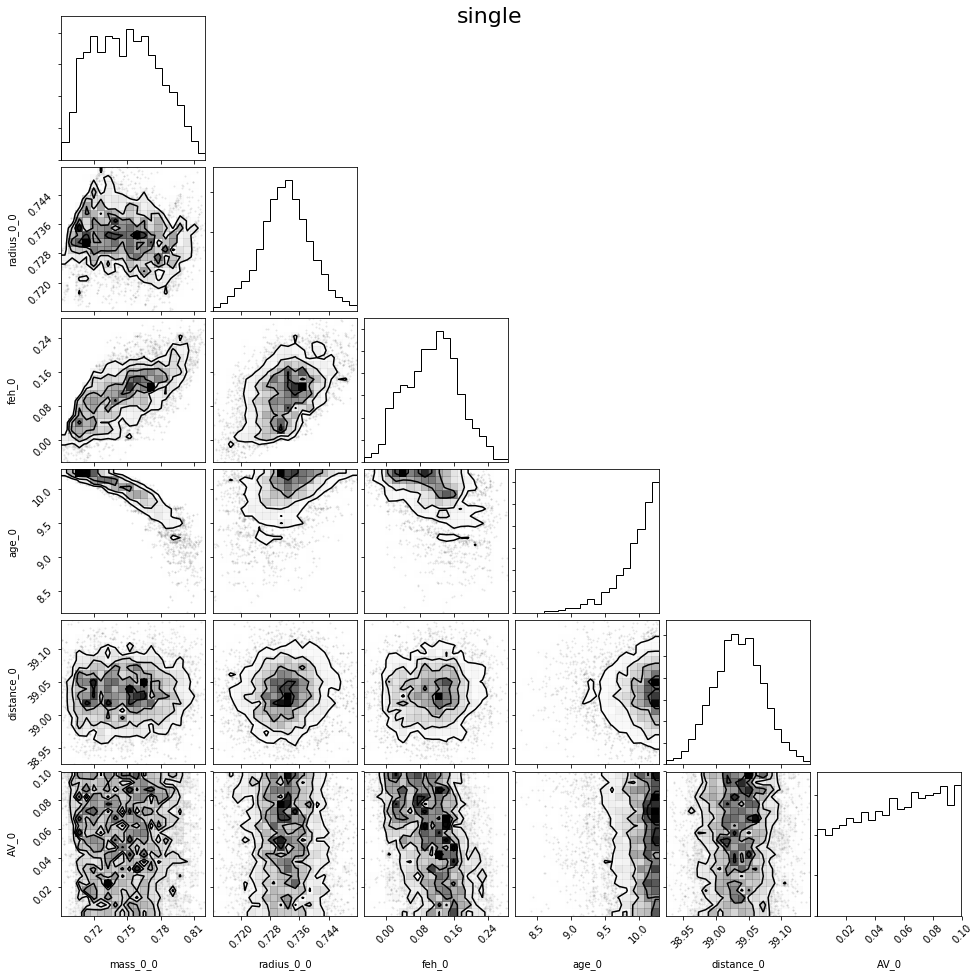

In [8]:
#HD23472 Gaia DR2 4674216245427964416
mags = {'B':(10.8,0.05),'V':(9.72,0.03) ,'J':(7.865,0.024),'K':(7.207,0.023)}#'H':(7.347,0.029),
print(mags)
# parallax including the zero point
parallax = np.array([25.5897+0.029,0.0261])

# Initializing the model with the parallax and parallax error information and the observed magnitude data
model1  = StarModel(mist, parallax=(parallax[0], parallax[1]), **mags)
model1._priors['AV'] = av_prior
#model2  = StarModel(dar, parallax=(parallax[0], parallax[1]), **mags)
#model2._priors['AV'] = av_prior
# Fitting the first model (takes on the order of minutes) and printing the output

model1.fit(refit=True, verbose=True)
print(model1.samples.mass_0_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.AV_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.feh_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.age_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.distance_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.radius_0_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.logL_0_0.quantile([0.16,0.50, 0.86]))

model1.corner_observed();
model1.corner_physical();


{'B': (9.302, 0.05), 'V': (8.143, 0.03), 'J': (6.081, 0.02), 'K': (5.375, 0.024)}
[6.12745e+01 2.64000e-02]


/home/rybizki/anaconda3/lib/python3.6/site-packages/isochrones/starmodel.py:487: RuntimeWarning: divide by zero encountered in log
  lnp += np.log(self.prior(prop, val))


------------------
mist isochrones
mass in Msun (percentiles written on the left): 
0.16    0.740495
0.50    0.760921
0.86    0.789182
Name: mass_0_0, dtype: float64
extinction A_V: 
0.16    0.027392
0.50    0.064073
0.86    0.091066
Name: AV_0, dtype: float64
[Fe/H]: 
0.16    0.255163
0.50    0.300023
0.86    0.365677
Name: feh_0, dtype: float64
Age in Gyr: 
0.16     9.527558
0.50     9.956431
0.86    10.173203
Name: age_0, dtype: float64
distance in pc: 
0.16    16.312903
0.50    16.319658
0.86    16.327159
Name: distance_0, dtype: float64
radius in solar radii: 
0.16    0.720980
0.50    0.727354
0.86    0.735167
Name: radius_0_0, dtype: float64
log lum in solar lum: 
0.16   -0.712994
0.50   -0.705590
0.86   -0.697746
Name: logL_0_0, dtype: float64
mist
mist


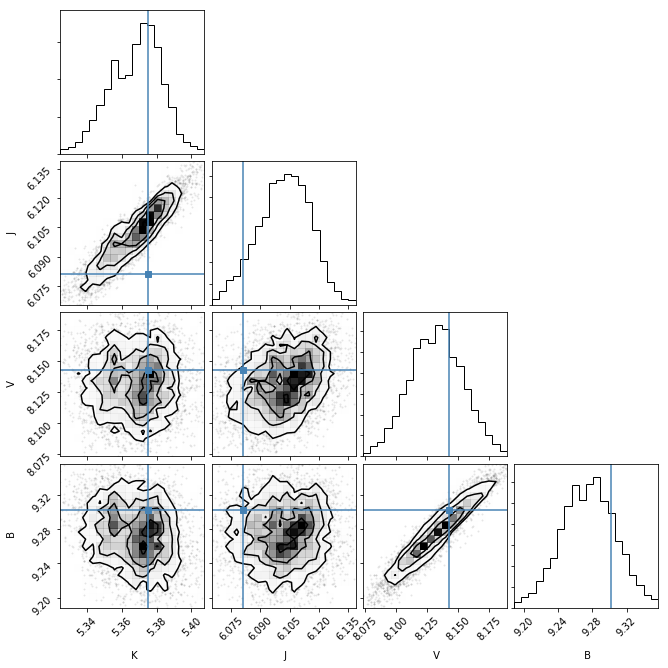

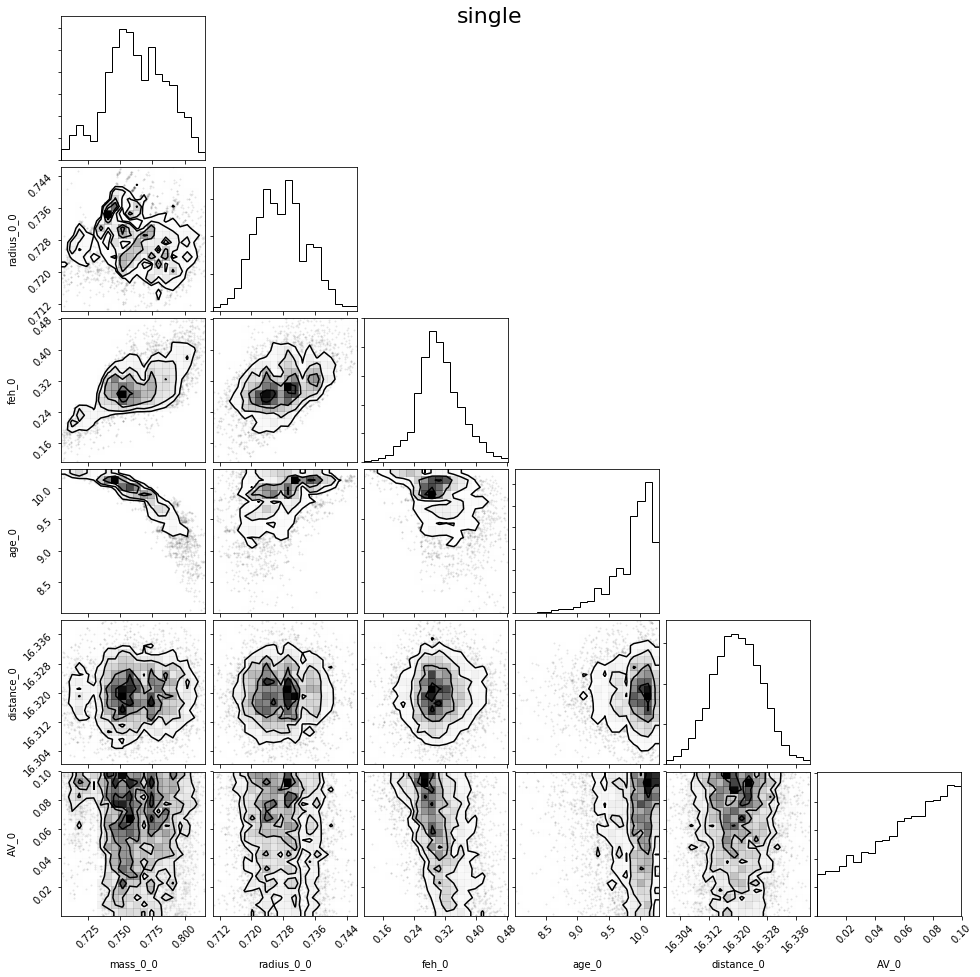

In [9]:
#HD 21749 Gaia DR2 4673947174316727040
mags = {'B':(9.302,0.05),'V':( 8.143,0.03) ,'J':(6.081,0.020),'K':( 5.375,0.024)}#'H':( 5.52 ,0.03),
print(mags)
parallax = np.array([61.2455+0.029,0.0264])
print(parallax)
# Initializing the model with the parallax and parallax error information and the observed magnitude data

model1  = StarModel(mist, parallax=(parallax[0], parallax[1]), **mags)
model1._priors['AV'] = av_prior
model1.fit(refit=True, verbose=True)
print('------------------')
print('mist isochrones')
#data['mass_mist_lower'][i],data['mass_mist'][i],data['mass_mist_upper'][i] = model1.samples.mass_0_0.quantile([0.15,0.50, 0.85]).get_values()
print(model1.samples.mass_0_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.AV_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.feh_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.age_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.distance_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.radius_0_0.quantile([0.16,0.50, 0.86]))
print(model1.samples.logL_0_0.quantile([0.16,0.50, 0.86]))
# Fitting the second model (takes on the order of minutes) and printing the output
model1.corner_observed();
model1.corner_physical();
